In [1]:
import requests
import pandas as pd
import numpy as np

In [2]:
#specify a web page for inspection
url = 'https://www.internetworldstats.com/list2.htm#a-c'
html = requests.get(url).content

In [3]:
df_list = pd.read_html(html)

In [4]:
df_a_c = df_list[5]
df_d_j = df_list[8]
df_k_p = df_list[11]
df_q_z = df_list[14]

In [5]:
df = df_a_c

In [6]:
df = df.append(df_d_j[1:], ignore_index=True)
df = df.append(df_k_p[1:], ignore_index=True)
df = df.append(df_q_z[1:], ignore_index=True)
df = df[:len(df)-2]

In [7]:
df.to_csv('my data.csv')

In [8]:
data = pd.read_csv('my data.csv')

In [9]:
data.columns = data.iloc[0]

In [10]:
data = data.reindex(data.index.drop(0))

In [11]:
data = data.drop(data.columns[0],axis=1)

In [12]:
data.head()

,Country or Region Name,Sym -bol,Size (sq. km.),Population (2018 est.),Internet Users,Internet Penetration,Data date
1,Afghanistan,AF,645807,36373176,5700905,15.7 %,Dec/2017
2,Africa,--,30221532,1287914329,453329534,35.2 %,Dec/2017
3,Aland Islands,AX,1580,28666,NaN,NaN,Dec/2014
4,Albania,AL,28748,2911428,1916233,65.8 %,Mar/2017
5,Algeria,DZ,2381741,42008054,18580000,44.2 %,Mar/2017


In [13]:
print("Total no. of rows and columns: ", data.shape)

Total no. of rows and columns:  (267, 7)


In [14]:
data.describe()

,Country or Region Name,Sym -bol,Size (sq. km.),Population (2018 est.),Internet Users,Internet Penetration,Data date
count,267,266,264,262,255,255,267
unique,267,251,256,256,249,222,9
top,Belgium,--,21,759451,5230000,57.0 %,Dec/2013
freq,1,9,2,2,2,3,109


In [15]:
data = pd.DataFrame(data)

In [16]:
data.isnull().sum()

0
Country or Region Name     0
Sym -bol                   1
Size (sq. km.)             3
Population (2018 est.)     5
Internet Users            12
Internet Penetration      12
Data date                  0
dtype: int64

In [17]:
data = data.convert_objects(convert_numeric=True)

/home/varshney/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [18]:
data['Internet Penetration'] = data['Internet Penetration'].str.replace('%','').astype(np.float64)

In [19]:
data.dtypes

0
Country or Region Name     object
Sym -bol                   object
Size (sq. km.)            float64
Population (2018 est.)    float64
Internet Users            float64
Internet Penetration      float64
Data date                  object
dtype: object

In [20]:
data[['Size (sq. km.)','Population (2018 est.)', 'Sym -bol']] = data[['Size (sq. km.)','Population (2018 est.)', 'Sym -bol']].fillna(0)

In [21]:
data[['Internet Penetration','Internet Users']] = data[['Internet Penetration','Internet Users']].fillna(0)

In [22]:
data.isnull().sum()

0
Country or Region Name    0
Sym -bol                  0
Size (sq. km.)            0
Population (2018 est.)    0
Internet Users            0
Internet Penetration      0
Data date                 0
dtype: int64

In [23]:
from sklearn.preprocessing import scale
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
x_scaled = scale(data['Internet Users'].sort_values())

In [25]:
y_scaled = scale(data['Size (sq. km.)'].sort_values())

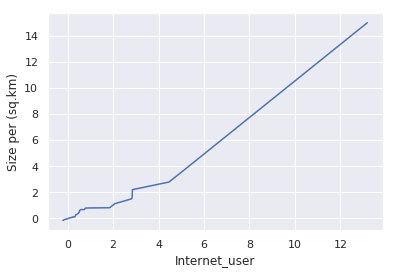

<Figure size 432x288 with 0 Axes>

In [26]:
sns.set()
plt.plot(x_scaled , y_scaled)
plt.xlabel('Internet_user')
plt.ylabel('Size per (sq.km)')
plt.show()
plt.savefig('Internet_user_Size_per_sq.km.png')

In [27]:
x_scaled_internet = scale(data['Internet Penetration'].sort_values())

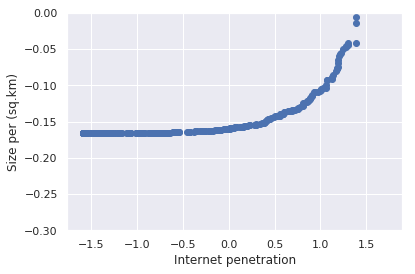

<Figure size 432x288 with 0 Axes>

In [28]:
plt.scatter(x_scaled_internet , y_scaled)
plt.xlabel('Internet penetration')
plt.ylabel('Size per (sq.km)')
plt.ylim((-0.3,0))
plt.show()
plt.savefig('Internet_penetration_Size_per_sq.km.png')

In [29]:
population_scaled = scale(data['Population (2018 est.)'].sort_values())

/home/varshney/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


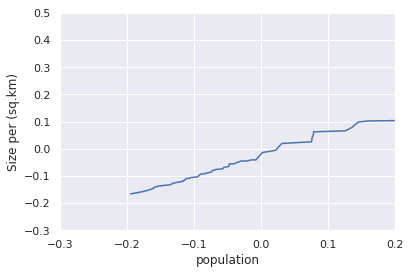

<Figure size 432x288 with 0 Axes>

In [30]:
plt.plot(population_scaled , y_scaled)
plt.xlim((-0.3,0.2))
plt.ylim((-0.3,0.5))
plt.xlabel('population')
plt.ylabel('Size per (sq.km)')
plt.show()
plt.savefig('population_Size_per_sq.km.png')

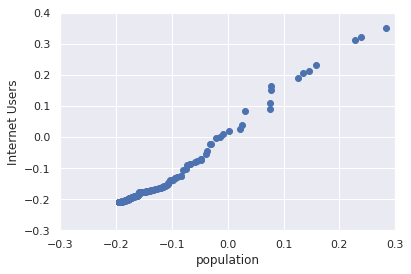

<Figure size 432x288 with 0 Axes>

In [31]:
plt.scatter(population_scaled , x_scaled)
plt.xlim((-0.3,0.3))
plt.ylim((-0.3,0.4))
plt.xlabel('population')
plt.ylabel('Internet Users')
plt.show()
plt.savefig('population_Internet_User.png')

In [32]:
import pymysql
from sqlalchemy import create_engine

In [33]:
engine = create_engine("mysql+pymysql://varshney:@localhost/db_country?charset=utf8")

In [34]:
con = engine.connect()

In [35]:
data.to_sql(name='country_table',con=con,if_exists='replace')

In [36]:
engine.execute("SELECT * FROM country_table LIMIT 10" ).fetchall()

[(1, 'Afghanistan', 'AF', 645807.0, 36373176.0, 5700905.0, 15.7, 'Dec/2017'),
 (2, 'Africa', '--', 30221532.0, 1287914329.0, 453329534.0, 35.2, 'Dec/2017'),
 (3, 'Aland Islands', 'AX', 1580.0, 28666.0, 0.0, 0.0, 'Dec/2014'),
 (4, 'Albania', 'AL', 28748.0, 2911428.0, 1916233.0, 65.8, 'Mar/2017'),
 (5, 'Algeria', 'DZ', 2381741.0, 42008054.0, 18580000.0, 44.2, 'Mar/2017'),
 (6, 'American Samoa', 'AS', 197.0, 55653.0, 22000.0, 39.5, 'Mar/2017'),
 (7, 'Andorra', 'AD', 464.0, 68728.0, 83728.0, 100.0, 'Mar/2017'),
 (8, 'Angola', 'AO', 1246700.0, 20655513.0, 5951453.0, 22.3, 'Mar/2017'),
 (9, 'Anguilla', 'AI', 96.0, 14906.0, 12557.0, 84.2, 'Mar/2017'),
 (10, 'Antarctica', 'AQ', 13209000.0, 2700.0, 4400.0, 100.0, 'Mar/2017')]

In [37]:
engine.execute("SELECT `Country or Region Name` FROM country_table WHERE (`Internet Users`/`Size (sq. km.)`) = (select MAX(`Internet Users`/`Size (sq. km.)`) from country_table)").fetchall()

/home/varshney/.local/lib/python3.6/site-packages/pymysql/cursors.py:170: Warning: (1365, 'Division by 0')
  result = self._query(query)


[('Macao, (China)',)]

In [38]:
engine.execute("select count(`Country or Region Name`) from country_table where `Internet Penetration`>30 AND `Population (2018 est.)`<34169169").fetchall()

[(138,)]

In [39]:
engine.execute("select left(`Country or Region Name`,1) as country, avg(`Size (sq. km.)`) as area from country_table group by country limit 10").fetchall()

[('A', 5431199.833333333),
 ('B', 512126.0),
 ('C', 7444466.2),
 ('D', 28944.5),
 ('E', 1713542.7),
 ('F', 127018.5),
 ('G', 220637.88888888888),
 ('H', 38981.166666666664),
 ('I', 885742.8888888889),
 ('J', 119565.25)]

In [40]:
engine.execute('select count(`Country or Region Name`) from country_table where `Internet Penetration` < BIN(10)').fetchall()

[(267,)]

In [41]:
engine.execute('select `Country or Region Name` from country_table where `Sym -bol` regexp "[^a-z0-9]+"').fetchall()

[('Africa',),
 ('Asia',),
 ('Caribbean, the',),
 ('Central America',),
 ('Europe',),
 ('Middle East',),
 ('North America',),
 ('Oceania',),
 ('South America',)]

In [42]:
engine.execute("SELECT `Country or Region Name`, `Data date` FROM country_table WHERE (`Internet Users`) = (select MAX(`Internet Users`) from country_table)").fetchall()

[('Asia', 'Dec/2017')]

In [43]:
engine.execute("select `Country or Region Name` from country_table where substring(`Country or Region Name`,2,1) = substring(`Sym -bol`,2,1) LIMIT 10").fetchall()

[('Afghanistan',),
 ('Albania',),
 ('Argentina',),
 ('Australia',),
 ('Azerbaijan',),
 ('Belgium',),
 ('Bolivia',),
 ('Brazil',),
 ('Canada',),
 ('Colombia',)]